In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve,
    precision_recall_curve
)

# For handling imbalance
from imblearn.over_sampling import SMOTE

In [3]:
df_Transaction = pd.read_csv('C:/Users/Administrator/Desktop/fraud-detection/data/processed/fraud_data_engineered.csv')

In [4]:
print(df_Transaction.columns.tolist())  # Display first 10 columns

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86'

In [5]:
df_Transaction.shape

(100000, 433)

## Feature Selection

#### Dropping columns not needed for modeling

In [6]:
# Drop columns not needed for modeling
columns_to_drop = [
    'TransactionID', 'TransactionDT', 'datetime', 
    'P_emaildomain', 'R_emaildomain',
    'amount_category', 'temporal_risk_category'
]

# Check which columns actually exist in df
columns_to_drop = [col for col in columns_to_drop if col in df_Transaction.columns]

df_model = df_Transaction.drop(columns=columns_to_drop)

In [7]:
df_model.shape

(100000, 426)

## Creating features and target

In [8]:
# Separate features and target
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']

In [9]:
X.shape, y.shape

((100000, 425), (100000,))

## Train/Test Split (Stratified)

In [10]:
# Stratified split to maintain 2.56% fraud rate in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [11]:
# Verify split maintained fraud rate
X_train.shape, X_test.shape, y_train.mean(), y_test.mean()

((80000, 425), (20000, 425), np.float64(0.0256125), np.float64(0.0256))

In [12]:
# Check for missing values
X_train.isna().sum().sum()

np.int64(12364643)

In [13]:
X_test.isna().sum().sum()

np.int64(3105454)

In [14]:

missing_train = X_train.isna().sum() / len(X_train) * 100

In [15]:
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)

missing_train.head(20)

D7       93.85250
dist2    91.67500
D13      90.39375
D12      89.43000
D14      88.70250
D6       87.17375
M8       83.96250
M9       83.96250
M7       83.96250
D8       78.19500
D9       78.19500
V9       71.16375
V11      71.16375
V1       71.16375
V2       71.16375
V3       71.16375
V10      71.16375
V7       71.16375
V6       71.16375
V4       71.16375
dtype: float64

In [16]:
print(missing_train.index.tolist())

['D7', 'dist2', 'D13', 'D12', 'D14', 'D6', 'M8', 'M9', 'M7', 'D8', 'D9', 'V9', 'V11', 'V1', 'V2', 'V3', 'V10', 'V7', 'V6', 'V4', 'V8', 'V5', 'D11', 'dist1', 'M5', 'M1', 'M3', 'M2', 'V154', 'V155', 'V153', 'V151', 'V166', 'V165', 'V164', 'V163', 'V162', 'V161', 'V160', 'V159', 'V158', 'V152', 'V157', 'V150', 'V149', 'V156', 'V148', 'V147', 'V146', 'V145', 'V144', 'V143', 'V142', 'V141', 'V140', 'V139', 'V138', 'V339', 'V327', 'V322', 'V331', 'V338', 'V337', 'V336', 'V335', 'V323', 'V333', 'V332', 'V334', 'V330', 'V329', 'V328', 'V326', 'V325', 'V324', 'D5', 'V229', 'V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V233', 'V230', 'V231', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V242', 'V241', 'V235', 'V240', 'V237', 'V236', 'V232', 'V193', 'V212', 'V213', 'V214', 'V215', 'V216', 'V177', 'V210', 'V186

In [17]:
missing_train.dtype

dtype('float64')

### Median Imputation

In [18]:
# Get the list of columns with missing values
cols_to_fill = missing_train.index.tolist()

In [19]:
# Fill numeric and non-numeric separately
for col in cols_to_fill:
    if col in X_train.columns:
        if X_train[col].dtype in ['float64', 'int64', 'float32', 'int32']:
            # Numeric: use median
            median_val = X_train[col].median()
            X_train[col] = X_train[col].fillna(median_val)
            X_test[col] = X_test[col].fillna(median_val)
        else:
            # Non-numeric: use 0 or mode
            X_train[col] = X_train[col].fillna(0)
            X_test[col] = X_test[col].fillna(0)

In [20]:
# Verify
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(np.int64(0), np.int64(0))

In [21]:
X_train.isnull().values.any(), X_test.isnull().values.any()

(np.False_, np.False_)

In [22]:
# Find ALL object type columns
object_cols = X_train.select_dtypes(include='object').columns.tolist()
print(f"Object columns: {object_cols}")

Object columns: ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [23]:
missing_m_cols = X_train.select_dtypes(include='object')

In [24]:
missing_m_cols.head(10)

,M1,M2,M3,M4,M5,M6,M7,M8,M9
94822,0,0,0,0,0,0,0,0,0
4614,T,T,T,0,0,T,F,F,T
52113,0,0,0,M2,0,0,0,0,0
69655,0,0,0,M2,0,0,0,0,0
10347,0,0,0,0,0,F,0,0,0
9295,0,0,0,0,0,T,0,0,0
10951,T,T,T,0,0,F,F,F,F
49652,0,0,0,0,0,0,0,0,0
71276,0,0,0,0,0,T,0,0,0
49201,T,T,T,0,0,T,T,T,T


In [25]:
# Check sample values in M columns
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    print(f"{col}: {X_train[col].dtype}, unique values: {X_train[col].unique()[:5]}")

M1: object, unique values: [0 'T']
M2: object, unique values: [0 'T' 'F']
M3: object, unique values: [0 'T' 'F']
M4: object, unique values: [0 'M2' 'M1' 'M0']
M5: object, unique values: [0 'T' 'F']
M6: object, unique values: [0 'T' 'F']
M7: object, unique values: [0 'F' 'T']
M8: object, unique values: [0 'F' 'T']
M9: object, unique values: [0 'T' 'F']


In [26]:
# Convert M1-M3, M5-M9 (T/F columns)
tf_cols = ['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']
for col in tf_cols:
    X_train[col] = X_train[col].replace({'T': 1, 'F': 0, 0: 0}).astype(float)
    X_test[col] = X_test[col].replace({'T': 1, 'F': 0, 0: 0}).astype(float)

# Convert M4 (M0, M1, M2 values) - treat as ordinal
X_train['M4'] = X_train['M4'].replace({'M0': 0, 'M1': 1, 'M2': 2, 0: 0}).astype(float)
X_test['M4'] = X_test['M4'].replace({'M0': 0, 'M1': 1, 'M2': 2, 0: 0}).astype(float)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17352\3167466875.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[col] = X_train[col].replace({'T': 1, 'F': 0, 0: 0}).astype(float)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17352\3167466875.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[col] = X_test[col].replace({'T': 1, 'F': 0, 0: 0}).astype(float)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17352\3167466875.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will b

In [27]:
# Verify all numeric
X_train.select_dtypes(include='object').columns.tolist()

[]

### Feature Scaling


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [29]:
# Verify
X_train_scaled.shape, X_test_scaled.shape

((80000, 425), (20000, 425))

In [30]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [31]:
# Check new class distribution
print(f"Original train: {y_train.value_counts()}")
print(f"\nBalanced train: {y_train_balanced.value_counts()}")
print(f"\nNew fraud rate: {y_train_balanced.mean():.2%}")

Original train: isFraud
0    77951
1     2049
Name: count, dtype: int64

Balanced train: isFraud
0    77951
1    77951
Name: count, dtype: int64

New fraud rate: 50.00%


## TRAIN MODELS

##### LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

In [34]:
print(f"Predictions made: {len(y_pred_lr)}")
print(f"Predicted fraud: {y_pred_lr.sum()}")

Predictions made: 20000
Predicted fraud: 3392


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

Logistic Regression Results:
[[16464  3024]
 [  144   368]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     19488
           1       0.11      0.72      0.19       512

    accuracy                           0.84     20000
   macro avg       0.55      0.78      0.55     20000
weighted avg       0.97      0.84      0.89     20000

ROC-AUC: 0.8530


#### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train_balanced, y_train_balanced)

y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [37]:
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

Random Forest Results:
[[18757   731]
 [  222   290]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     19488
           1       0.28      0.57      0.38       512

    accuracy                           0.95     20000
   macro avg       0.64      0.76      0.68     20000
weighted avg       0.97      0.95      0.96     20000

ROC-AUC: 0.8857


In [39]:
# Create comparison dataframe
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'ROC-AUC': [0.8530, 0.8857],
    'Precision': [0.11, 0.28],
    'Recall': [0.72, 0.57],
    'F1-Score': [0.19, 0.38]
})

results

,Model,ROC-AUC,Precision,Recall,F1-Score
0,Logistic Regression,0.8530,0.11,0.72,0.19
1,Random Forest,0.8857,0.28,0.57,0.38


### xgboost

In [42]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 7.6 MB/s eta 0:00:10
   - -------------------------------------- 3.1/72.0 MB 7.9 MB/s eta 0:00:09
   -- ------------------------------------- 5.0/72.0 MB 8.0 MB/s eta 0:00:09
   --- ------------------------------------ 6.8/72.0 MB 8.3 MB/s eta 0:00:08
   ---- ----------------------------------- 8.7/72.0 MB 8.4 MB/s eta 0:00:08
   ----- ---------------------------------- 10.5/72.0 MB 8.5 MB/s eta 0:00:08
   ------ --------------------------------- 12.6/72.0 MB 8.6 MB/s eta 0:00:07
   -------- ------------------------------- 14.4/72.0 MB 8.6 MB/s eta 0:00:07
   --------- ------------------------------ 16.3/72.0 MB 8.6 MB/s eta 0:00:07
   ---------- ----------------------------- 18.1/72.0 MB 8.6 MB/s eta 0:00:07
   ---------- ----------------------------- 19.7/72.0 MB 8.5 MB/s eta 0:00:07
   ----------- ---------------------------- 21.2/72.0 MB 8.4 MB/s eta 0:00:07

In [43]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb.fit(X_train_balanced, y_train_balanced)

y_pred_xgb = xgb.predict(X_test_scaled)
y_pred_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

c:\Users\Administrator\anaconda3\envs\fraud_env\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:08:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [44]:
print("XGBoost Results:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

XGBoost Results:
[[19394    94]
 [  285   227]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19488
           1       0.71      0.44      0.55       512

    accuracy                           0.98     20000
   macro avg       0.85      0.72      0.77     20000
weighted avg       0.98      0.98      0.98     20000

ROC-AUC: 0.8975


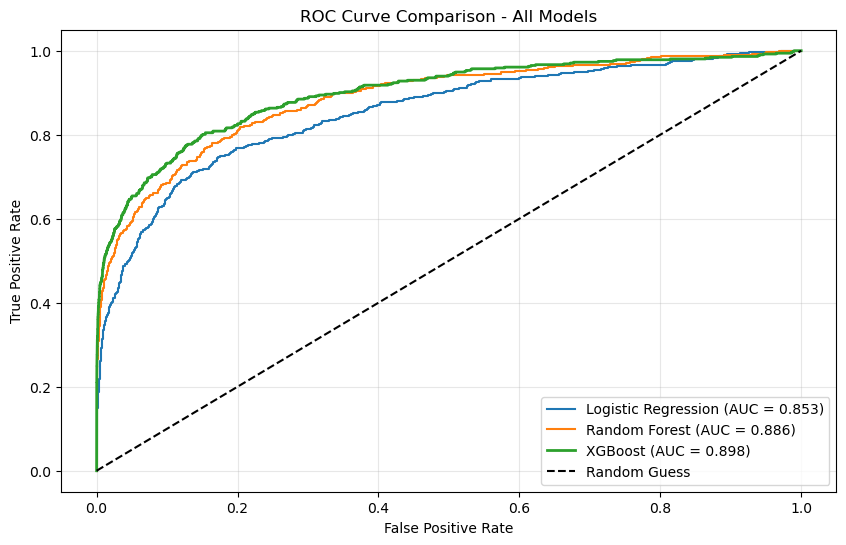

In [46]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)


plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = 0.853)')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = 0.886)')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = 0.898)', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - All Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [47]:
import joblib

joblib.dump(xgb, '../models/xgboost_fraud_model.pkl')
joblib.dump(rf, '../models/random_forest_fraud_model.pkl')
joblib.dump(log_reg, '../models/logistic_regression_fraud_model.pkl')

['../models/logistic_regression_fraud_model.pkl']

In [ ]:
results_final = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'ROC-AUC': [0.8530, 0.8857, 0.8975],
    'Precision': [0.11, 0.28, 0.71],
    'Recall': [0.72, 0.57, 0.44],
    'F1-Score': [0.19, 0.38, 0.55],
    'False Positives': [3024, 731, 94]
})

results_final

,Model,ROC-AUC,Precision,Recall,F1-Score,False Positives
0,Logistic Regression,0.8530,0.11,0.72,0.19,3024
1,Random Forest,0.8857,0.28,0.57,0.38,731
2,XGBoost,0.8975,0.71,0.44,0.55,94


### FEATURE IMPORTANCE ANALYSIS

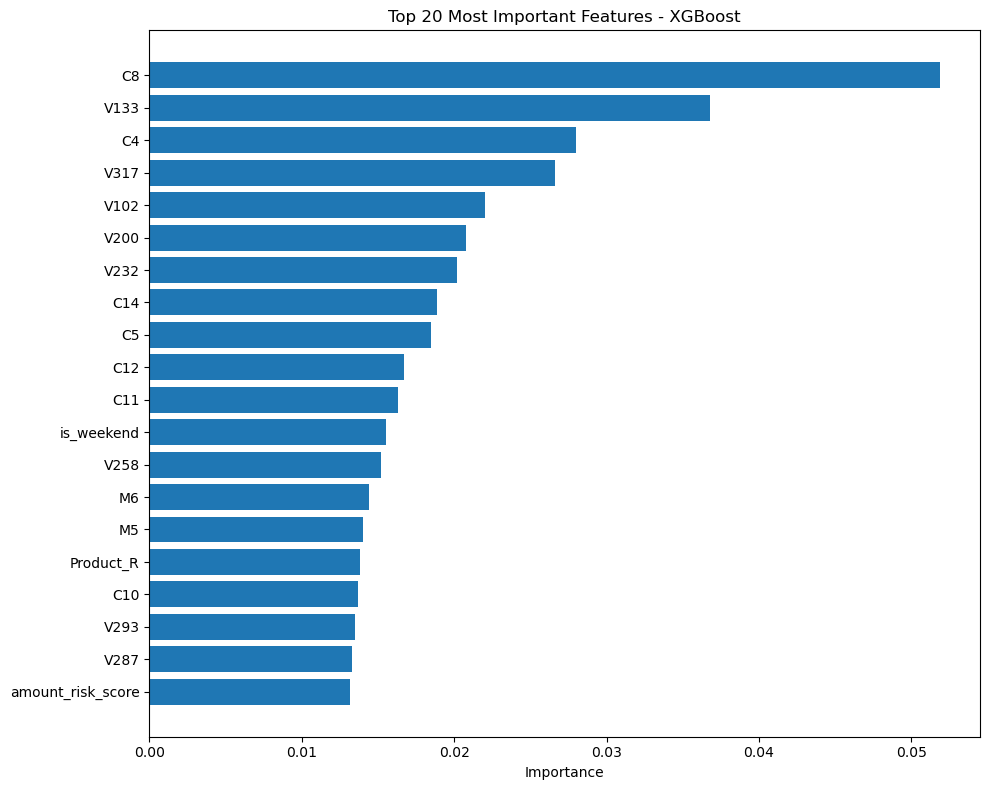

In [49]:
# Get feature importance from XGBoost
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values('Importance', ascending=False)

# Top 20 most important features
top_20 = feature_importance.head(20)

plt.figure(figsize=(10, 8))
plt.barh(top_20['Feature'], top_20['Importance'])
plt.xlabel('Importance')
plt.title('Top 20 Most Important Features - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [50]:
# Create risk scoring system based on probability thresholds
risk_thresholds = {
    'Very Low Risk': (0, 0.1),
    'Low Risk': (0.1, 0.3),
    'Medium Risk': (0.3, 0.5),
    'High Risk': (0.5, 0.7),
    'Very High Risk': (0.7, 1.0)
}

def assign_risk_category(prob):
    for category, (low, high) in risk_thresholds.items():
        if low <= prob < high:
            return category
    return 'Very High Risk'

# Apply to test set
risk_categories = pd.Series(y_pred_proba_xgb).apply(assign_risk_category)
risk_distribution = risk_categories.value_counts()

risk_distribution

Very Low Risk     17903
Low Risk           1497
Medium Risk         279
Very High Risk      198
High Risk           123
Name: count, dtype: int64

### BUSINESS IMPACT ANALYSIS
========================

**Fraud Detection:**
- Total fraud cases: 512
- Frauds detected: 227 (44%)
- Frauds missed: 285 (56%)

**Financial Impact:**
- Total fraud amount: $68,608
- Fraud prevented: $30,418
- False positive cost: $470
- Net savings: $29,948

**Customer Experience:**
- Legitimate transactions blocked: 94 (0.48% of all transactions)
- Customer friction: Minimal

#### Recommendations:
1. Auto-approve Very Low Risk (90% of transactions)
2. Apply 2FA for High/Very High Risk (1.6% of transactions)
3. Manual review queue for Medium Risk (1.4% of transactions)
4. Monitor and retrain model quarterly with new fraud patterns

In [52]:
# Simple risk scoring function for deployment
def predict_fraud_risk(transaction_features):
    """
    Predicts fraud risk for a transaction
    
    Returns: risk_score (0-1), risk_category, recommended_action
    """
    # Get probability from model
    risk_score = xgb.predict_proba([transaction_features])[0][1]
    
    # Assign category
    if risk_score < 0.1:
        category = "Very Low Risk"
        action = "Auto-approve"
    elif risk_score < 0.3:
        category = "Low Risk"
        action = "Standard processing"
    elif risk_score < 0.5:
        category = "Medium Risk"
        action = "Light review"
    elif risk_score < 0.7:
        category = "High Risk"
        action = "Manual review"
    else:
        category = "Very High Risk"
        action = "Block/Require 2FA"
    
    return {
        'risk_score': round(risk_score, 4),
        'risk_category': category,
        'recommended_action': action
    }

# Test on a sample transaction
sample_transaction = X_test_scaled.iloc[0]
result = predict_fraud_risk(sample_transaction)
result

{'risk_score': np.float32(0.0236),
 'risk_category': 'Very Low Risk',
 'recommended_action': 'Auto-approve'}